In [1]:
%run '/home/gvolta/Desktop/Function/Useful/Def.ipynb'
%run '/home/gvolta/Desktop/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 04/11/2019
Initialization for S1PL, Notebook was last run on: 04/11/2019


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

In [3]:
file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/cut_selection/'

In [4]:
data_1 = pd.read_pickle(file_path + 'data_1.pkl')

In [5]:
from statsmodels.stats.proportion import proportion_confint
binomial_error_method = 'wilson'
binomial_alpha = 0.68


def acceptance(data_before, data_after):
    after, bins=np.histogram(data_after ,bins=Bins, range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins, range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)
    
    plt.errorbar(binn, acceptance, err,0, marker='.', markersize=5, linestyle="", linewidth=0.5, color='navy')
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance')
    plt.ylim(0,1.05)
    

# Cut on S1 without z

In [72]:
popt_z = [2.24998799e+02, 4.83787365e-04, 1.67611380e-01]
popt_1 = [ 1.37309377e+01,  2.52014467e+01, -1.00423665e+00,  1.31231569e-02]
popt_2 = [ 2.08291326e+02,  6.93931890e-03, -4.68710282e-07,  3.27152015e-11]
S1_thr = 195
data_1['CutS1PL'] = (((data_1['s1_pattern_fit_bottom_hax'] < S1PatternLikelihoodProfile_1(data_1['s1'], *popt_1))*(data_1['s1']<S1_thr))
                      |((data_1['s1_pattern_fit_bottom_hax'] < S1PatternLikelihoodProfile_2(data_1['s1'], *popt_2))*(data_1['s1']>=S1_thr)))
data_1['CutS1PL_withZ'] = (((data_1['s1_pattern_fit_bottom_hax'] < S1PatternLikelihoodProfile_1(data_1['s1'], *popt_1))*(data_1['s1']<S1_thr))
                          |((data_1['s1_pattern_fit_bottom_hax'] < S1PatternLikelihoodProfile_2(data_1['s1'], *popt_2))*(data_1['s1']>=S1_thr)))\
                          &((data_1['s1_pattern_fit_bottom_hax'] < exp(data_1['z_3d_nn_tf'], *popt_z)))

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [73]:
data_cut = hax.cuts.selection(data_1, data_1['CutS1PL'] == True)
data_cut_withz = hax.cuts.selection(data_1, data_1['CutS1PL_withZ'] == True)

Unnamed selection: 22361 rows removed (94.57% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 26289 rows removed (93.61% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


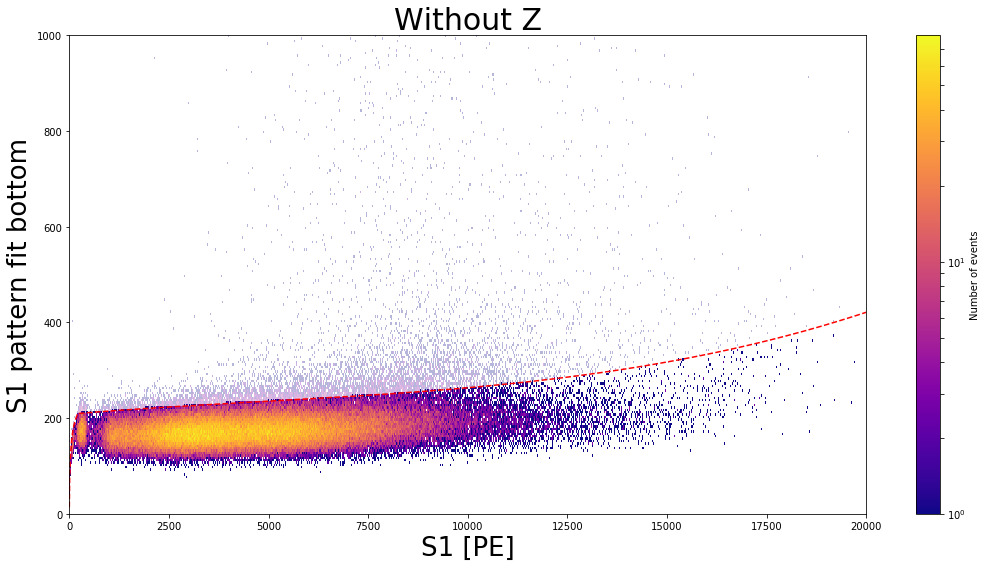

In [80]:
y = []
x = np.linspace(0, 2e4, 2000)
for i in range(len(x)):
    y.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<S1_thr) + \
                 (S1PatternLikelihoodProfile_2(x[i], *popt_2))*(x[i]>=S1_thr))

plt.figure(figsize=(15,8))
hist, xbins, ybins, _ = plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], 
                                   bins = (2000, 200), 
                                   range=((0,2e4), (0,1000)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut['s1'], data_cut['s1_pattern_fit_bottom_hax'], 
                                               bins = (2000, 200), 
                                               range=((0,2e4), (0,1000)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.plot(x, y, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.title('Without Z', fontsize=30)

plt.tight_layout()
plt.show()
hist[np.isnan(hist)] = 0
hist_cut[np.isnan(hist_cut)] = 0

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


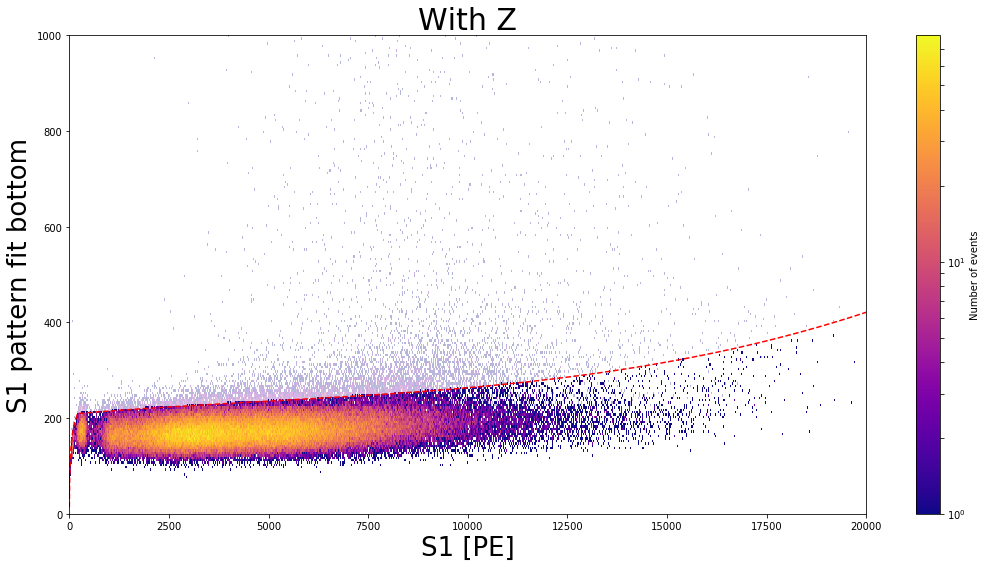

In [81]:
y = []
x = np.linspace(0, 2e4, 2000)
for i in range(len(x)):
    y.append((S1PatternLikelihoodProfile_1(x[i], *popt_1))*(x[i]<S1_thr) + \
                 (S1PatternLikelihoodProfile_2(x[i], *popt_2))*(x[i]>=S1_thr))

plt.figure(figsize=(15,8))
hist, xbins, ybins, _ = plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], 
                                   bins = (2000, 200), 
                                   range=((0,2e4), (0,1000)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_cut, xbins_cut, ybins_cut, _ = plt.hist2d(data_cut_withz['s1'], data_cut_withz['s1_pattern_fit_bottom_hax'], 
                                               bins = (2000, 200), 
                                               range=((0,2e4), (0,1000)), 
                                               cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                               cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.plot(x, y, 'r--', label = 'S1 Pattern Likelihood Cut')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.title('With Z', fontsize=30)

plt.tight_layout()
plt.show()
hist[np.isnan(hist)] = 0
hist_cut[np.isnan(hist_cut)] = 0

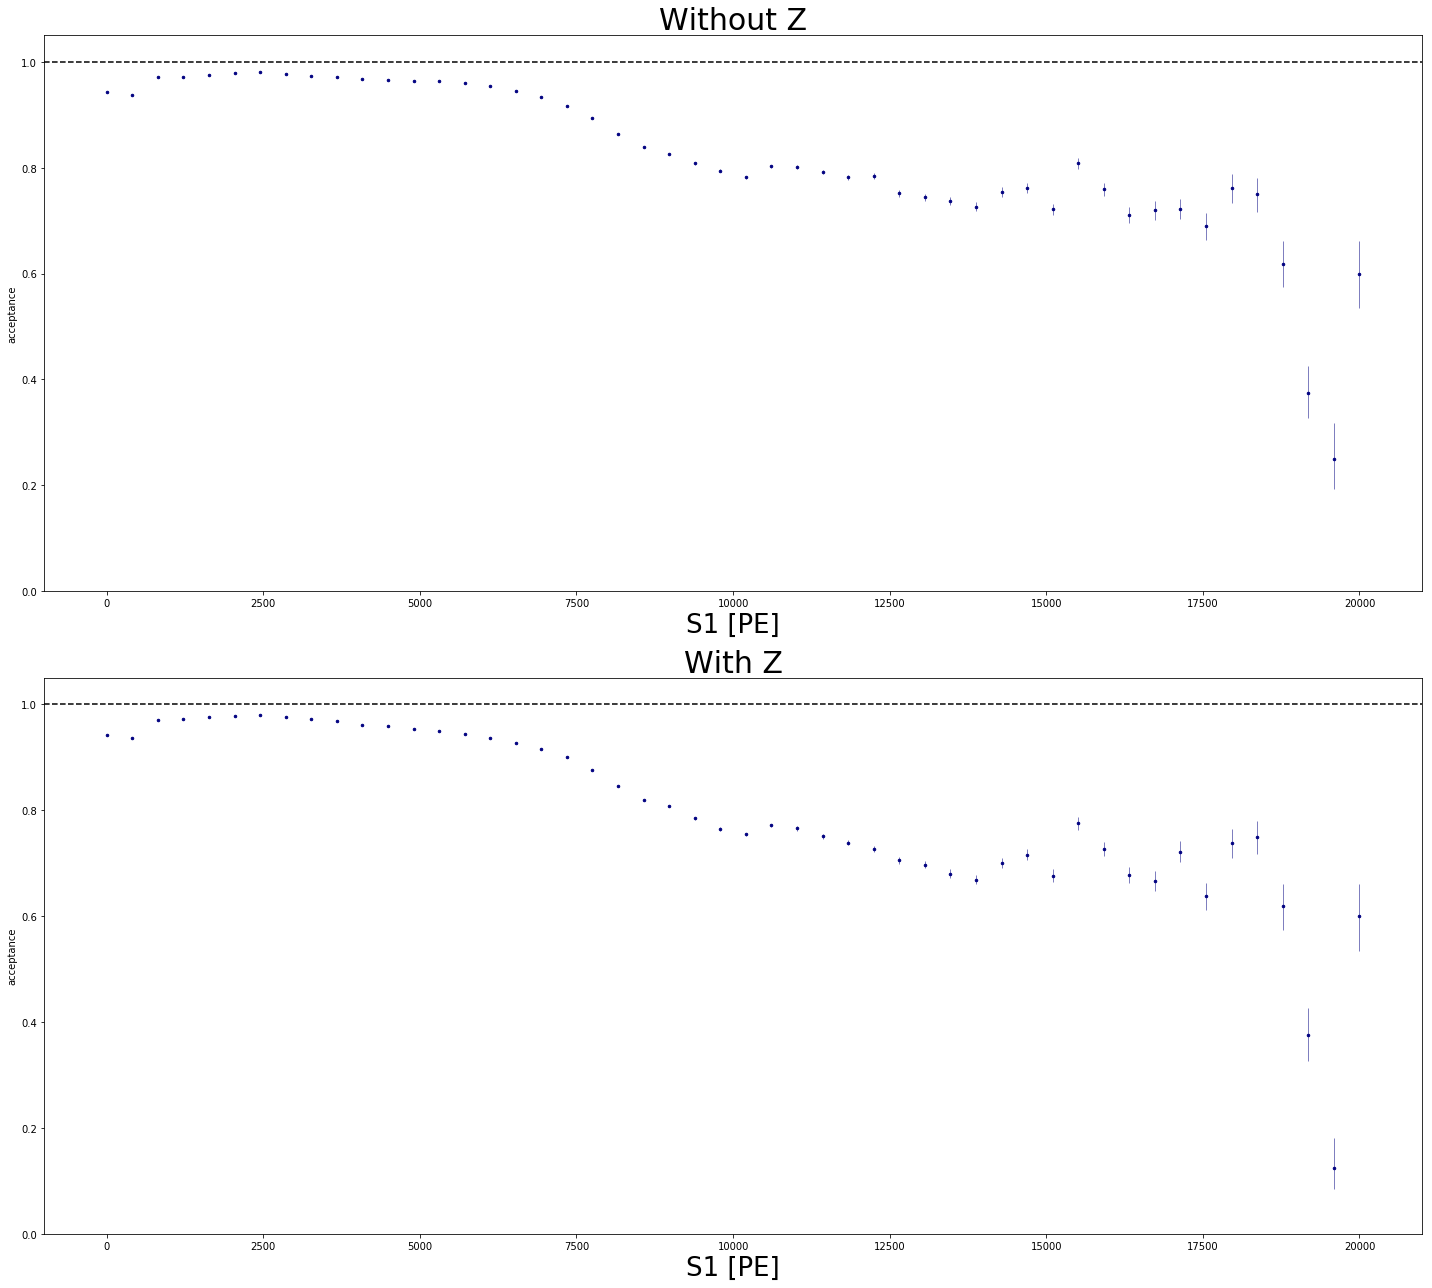

In [79]:
Bins=50
hist_range=([0,2e4])  
binn=np.linspace(0,2e4,Bins)

fig = plt.figure(figsize=(20, 18))
plt.subplot(211)
acceptance(data_1['s1'], data_cut['s1'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S1 [PE]', fontsize=26)
#plt.legend(loc='best')
plt.title('Without Z', fontsize=30)

plt.subplot(212)
acceptance(data_1['s1'], data_cut_withz['s1'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S1 [PE]', fontsize=26)
#plt.legend(loc='best')
plt.title('With Z',fontsize=30)
plt.tight_layout()
plt.show()

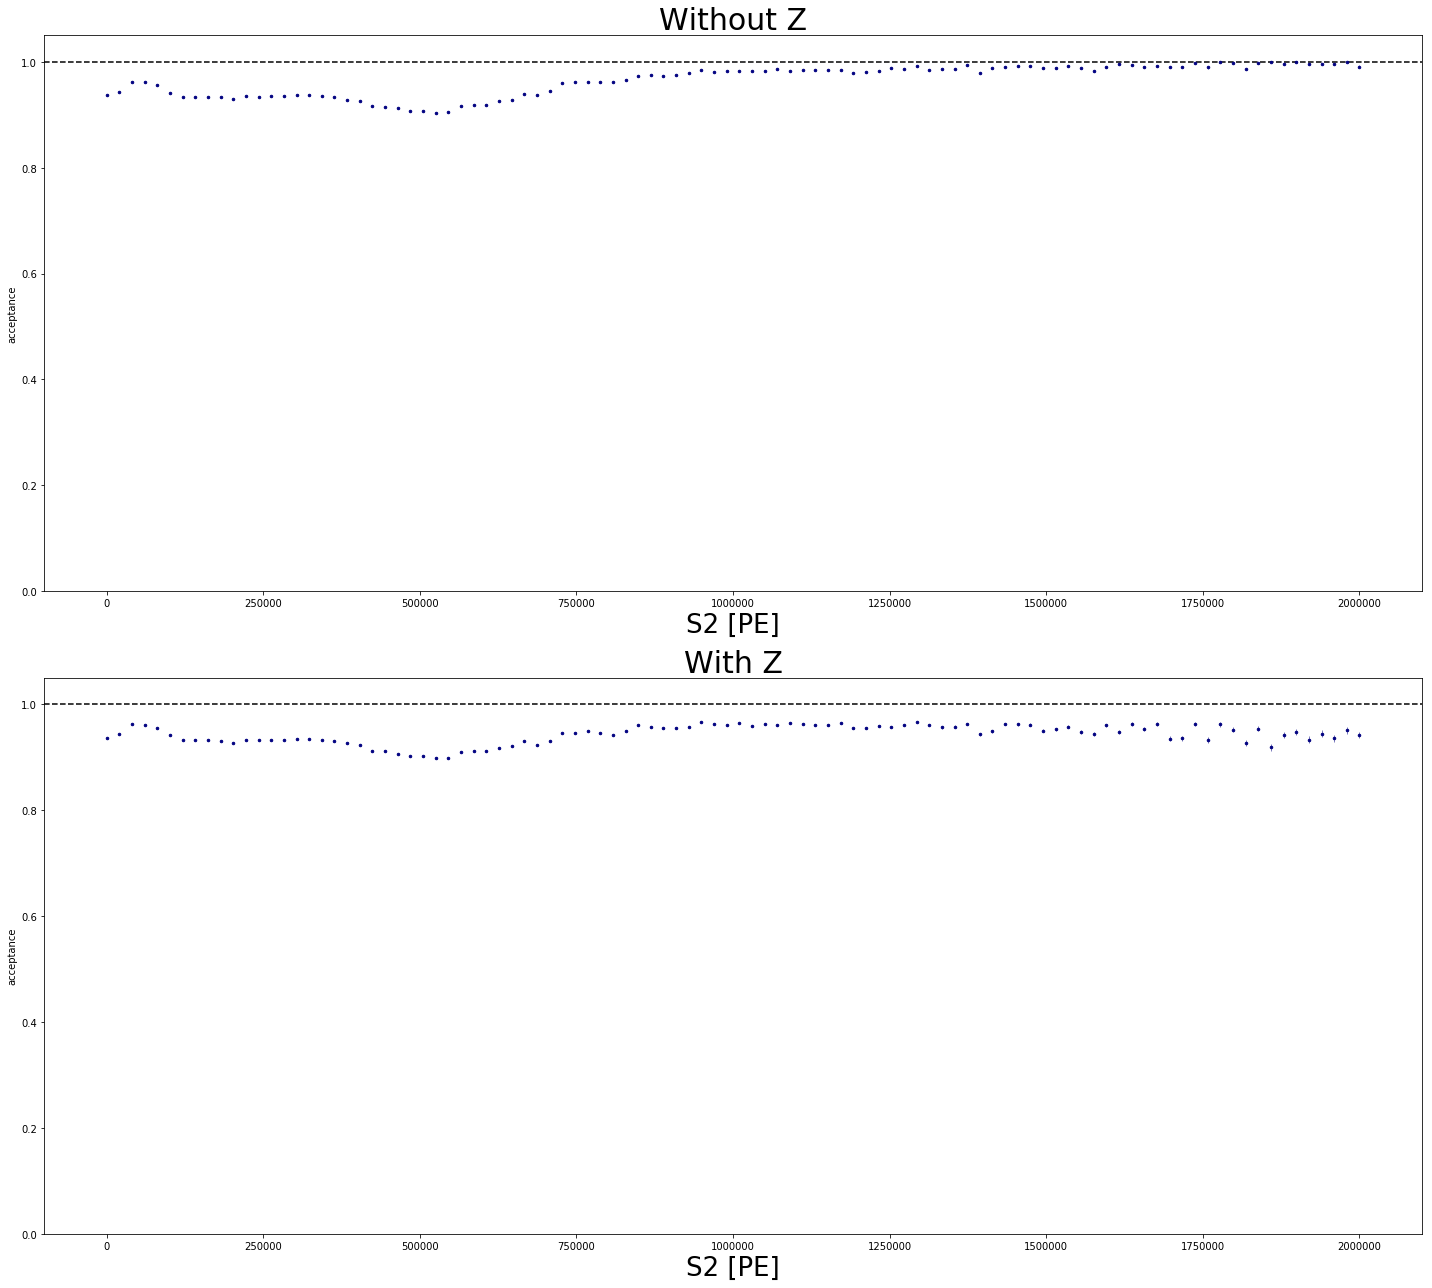

In [83]:
Bins=100
hist_range=([0, 2e6])  
binn=np.linspace(0,2e6,Bins)

fig = plt.figure(figsize=(20, 18))
plt.subplot(211)
acceptance(data_1['s2'], data_cut['s2'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S2 [PE]', fontsize=26)
#plt.legend(loc='best')
plt.title('Without Z', fontsize=30)

plt.subplot(212)
acceptance(data_1['s2'], data_cut_withz['s2'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('S2 [PE]', fontsize=26)
#plt.legend(loc='best')
plt.title('With Z',fontsize=30)
plt.tight_layout()
plt.show()

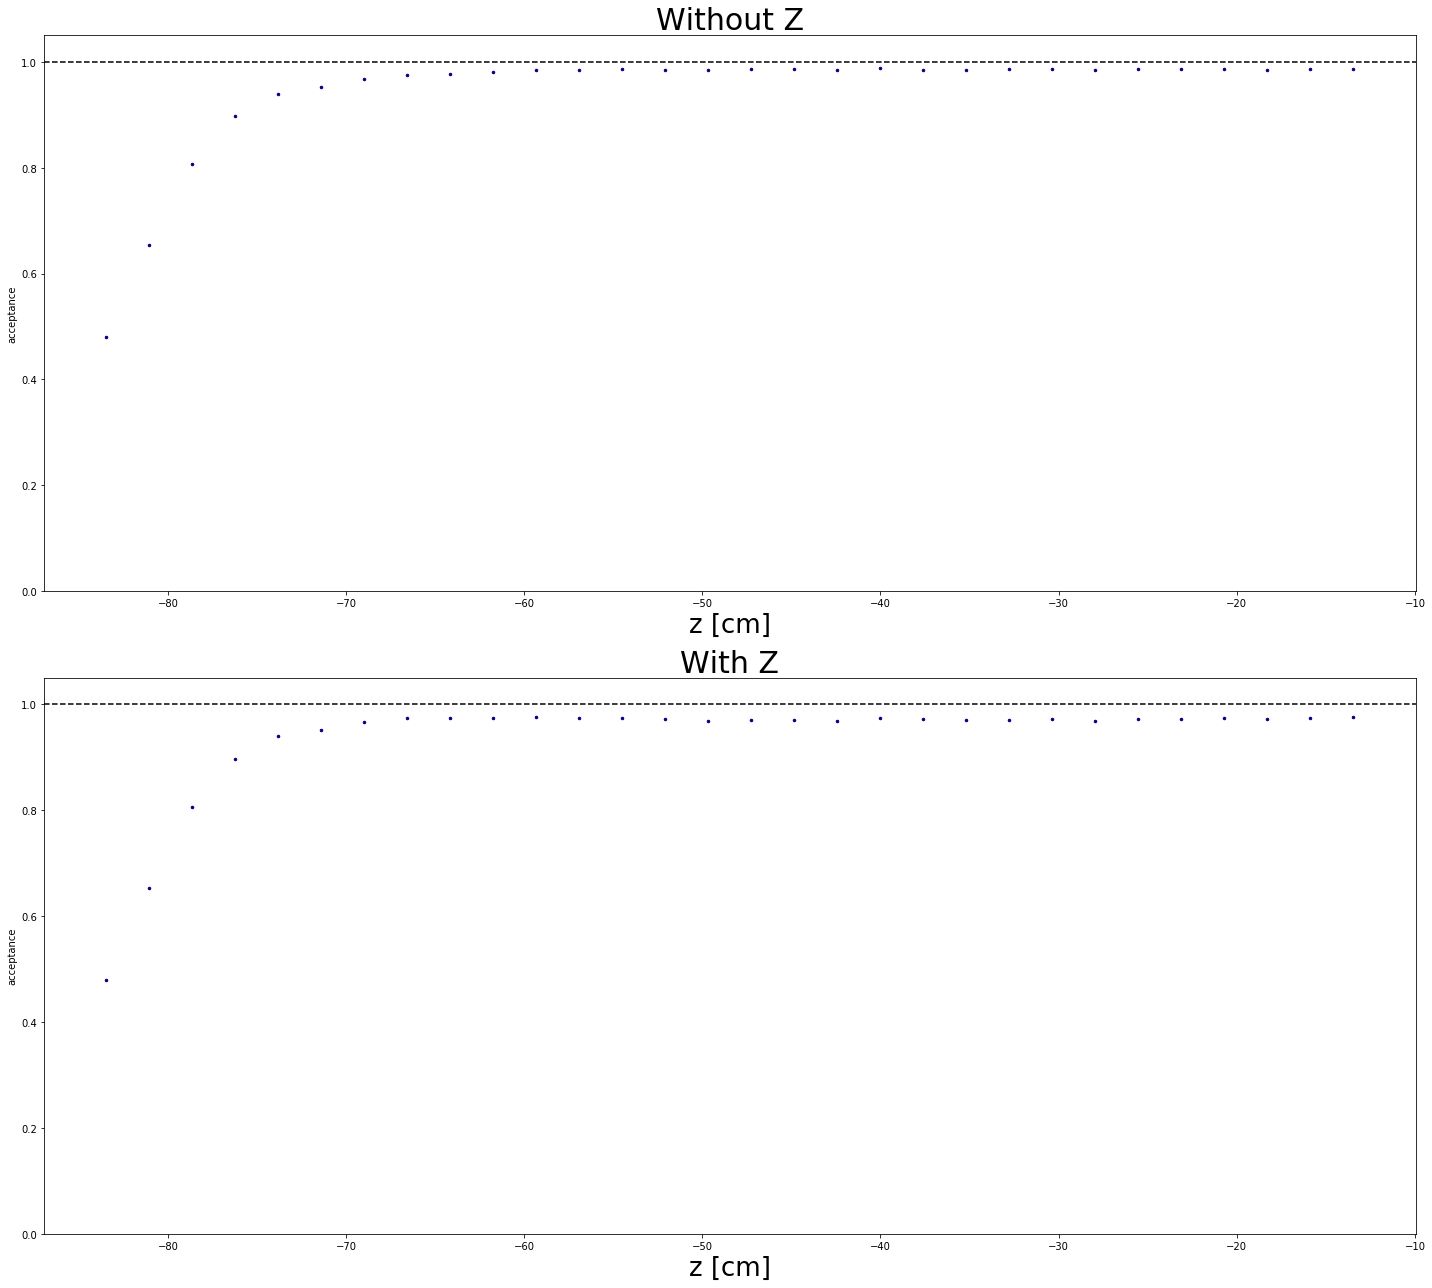

In [84]:
Bins=30
hist_range=([-83.45, -13.45])  
binn=np.linspace(-83.45, -13.45,Bins)

fig = plt.figure(figsize=(20, 18))
plt.subplot(211)
acceptance(data_1['z_3d_nn_tf'], data_cut['z_3d_nn_tf'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('z [cm]', fontsize=26)
#plt.legend(loc='best')
plt.title('Without Z', fontsize=30)

plt.subplot(212)
acceptance(data_1['z_3d_nn_tf'], data_cut_withz['z_3d_nn_tf'])
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('z [cm]', fontsize=26)
#plt.legend(loc='best')
plt.title('With Z',fontsize=30)
plt.tight_layout()
plt.show()

# Which data are cutted in the z space?

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


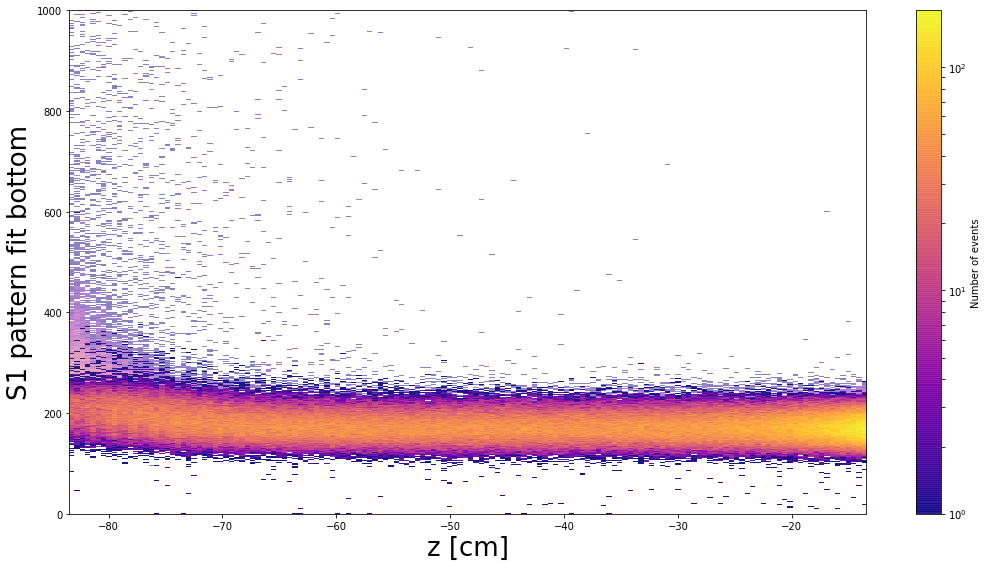

In [11]:
-

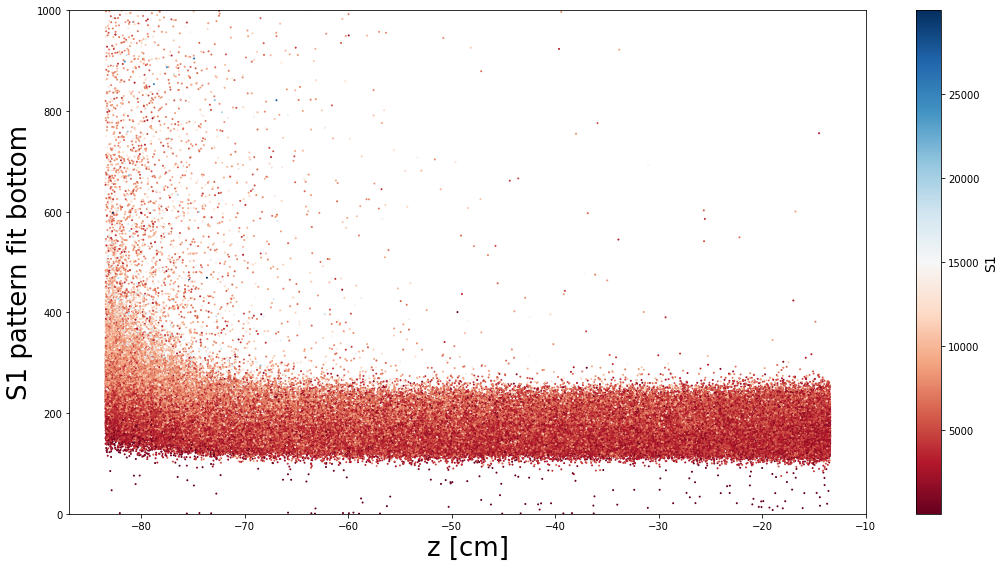

In [12]:
plt.figure(figsize=(15,8))

plt.scatter(data_1['z_3d_nn_tf'], data_1['s1_pattern_fit_bottom_hax'], c=data_1['s1'], cmap='RdBu', s=1)
plt.colorbar().set_label('S1', fontsize=14)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.ylim(0,1000)
plt.tight_layout()
plt.show()

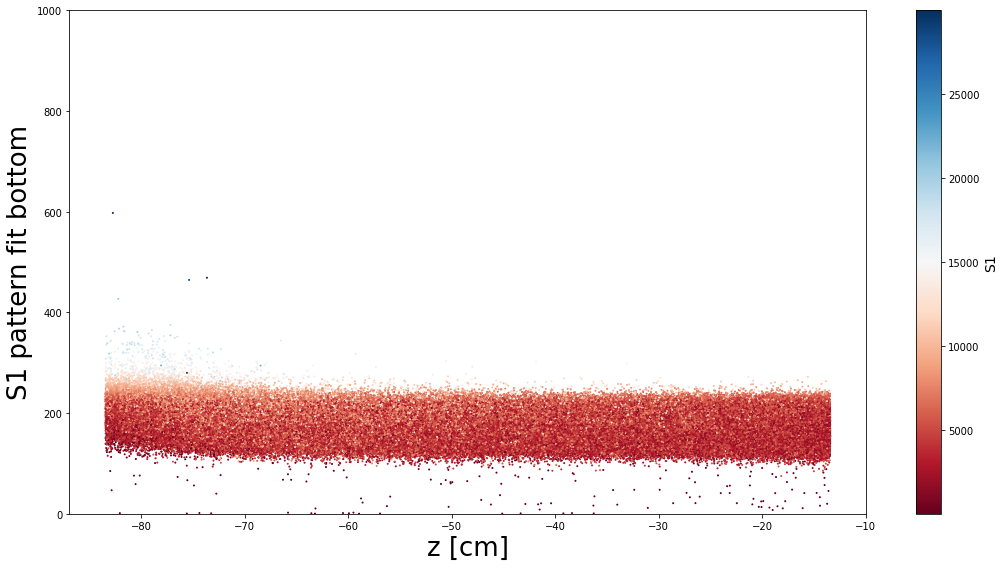

In [13]:
plt.figure(figsize=(15,8))

plt.scatter(data_cut['z_3d_nn_tf'], data_cut['s1_pattern_fit_bottom_hax'], c=data_cut['s1'], cmap='RdBu', s=1)
plt.colorbar().set_label('S1', fontsize=14)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.ylim(0,1000)
plt.tight_layout()
plt.show()

Unnamed selection: 389196 rows removed (5.43% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


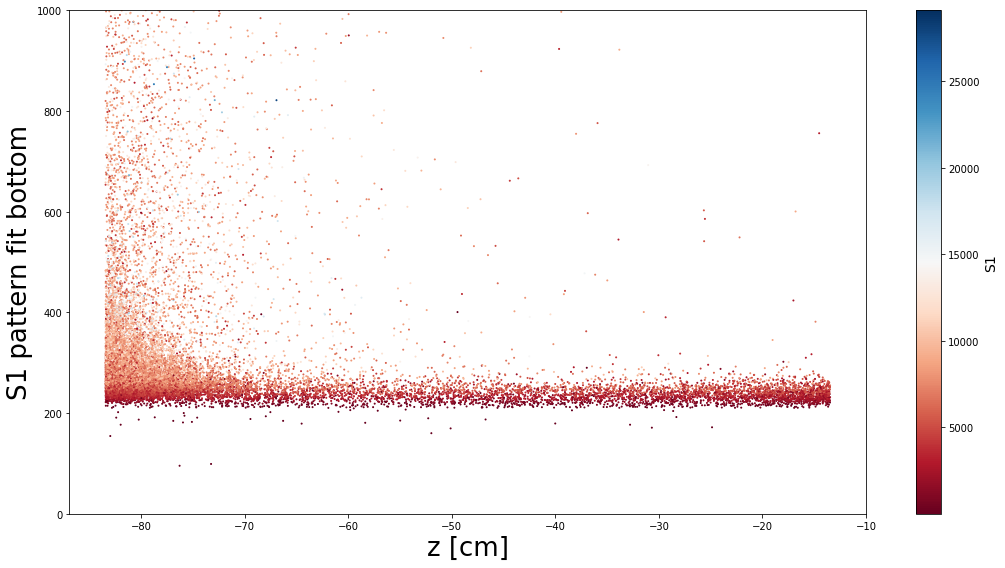

In [14]:
data_no_cut = hax.cuts.selection(data_1, data_1['CutS1PL'] == False)

plt.figure(figsize=(15,8))

plt.scatter(data_no_cut['z_3d_nn_tf'], data_no_cut['s1_pattern_fit_bottom_hax'], c=data_no_cut['s1'], cmap='RdBu', s=1)
plt.colorbar().set_label('S1', fontsize=14)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.ylim(0,1000)
plt.tight_layout()
plt.show()

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


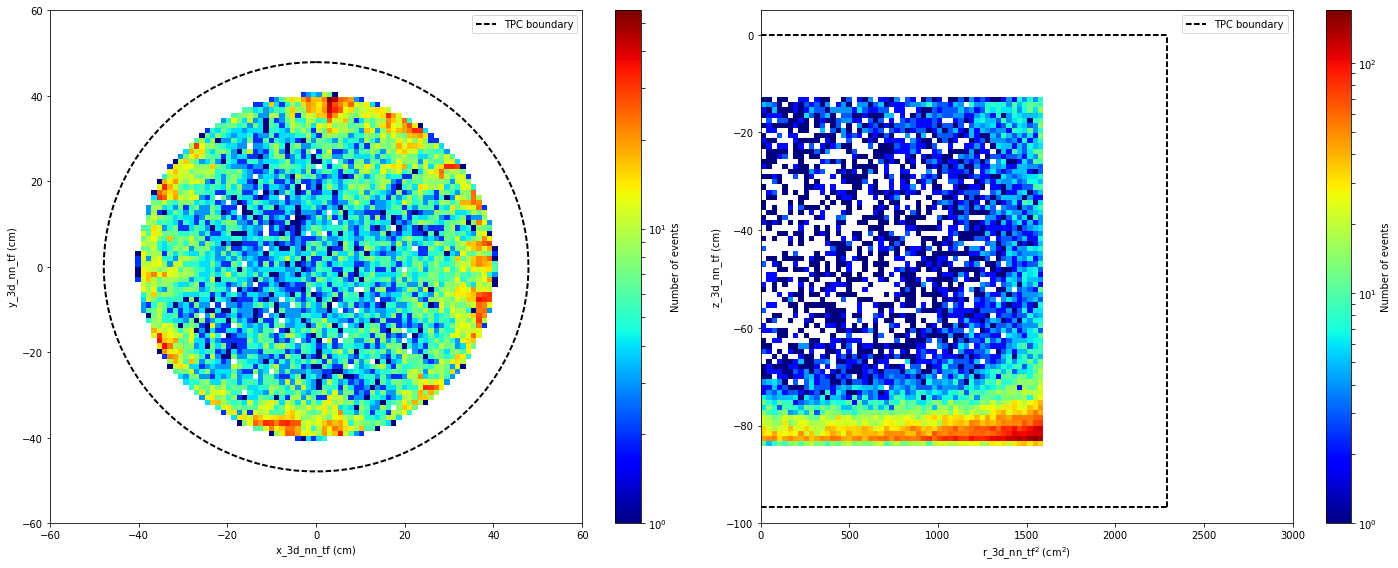

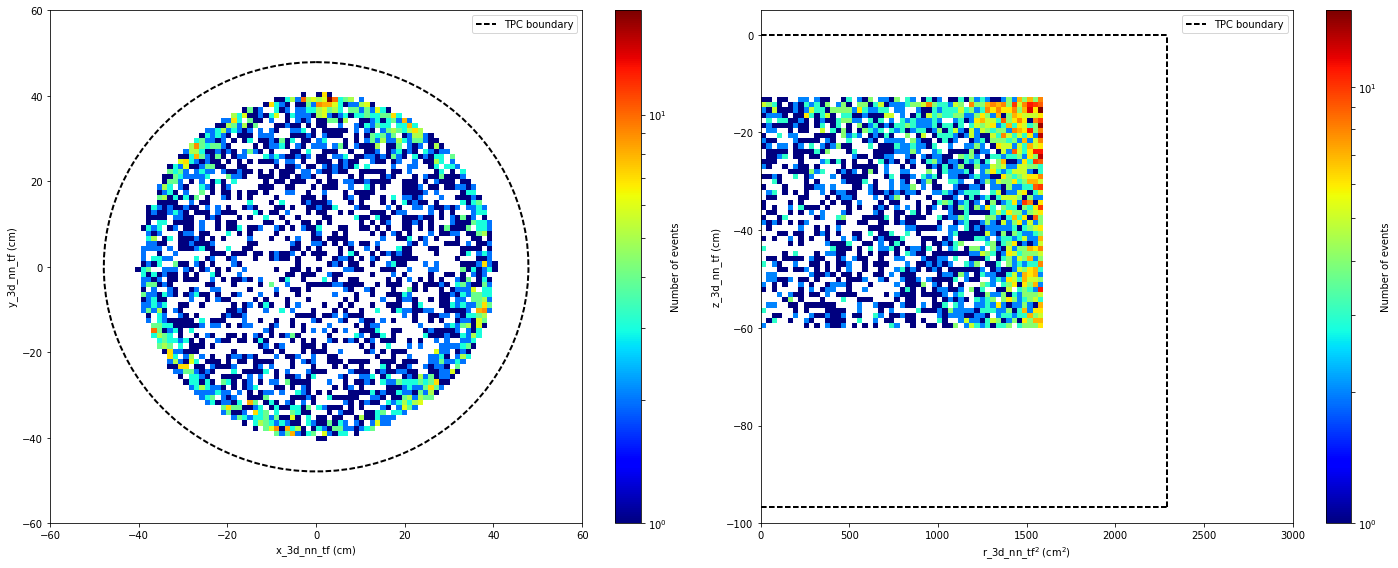

In [15]:
data_no_cut_2 = data_no_cut[data_no_cut['z_3d_nn_tf']>-60]
data_distribution(data_no_cut, 'x_3d_nn_tf', 'y_3d_nn_tf', 'z_3d_nn_tf', 'r_3d_nn_tf', bins=[100,100])
data_distribution(data_no_cut_2, 'x_3d_nn_tf', 'y_3d_nn_tf', 'z_3d_nn_tf', 'r_3d_nn_tf', bins=[100,100])

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


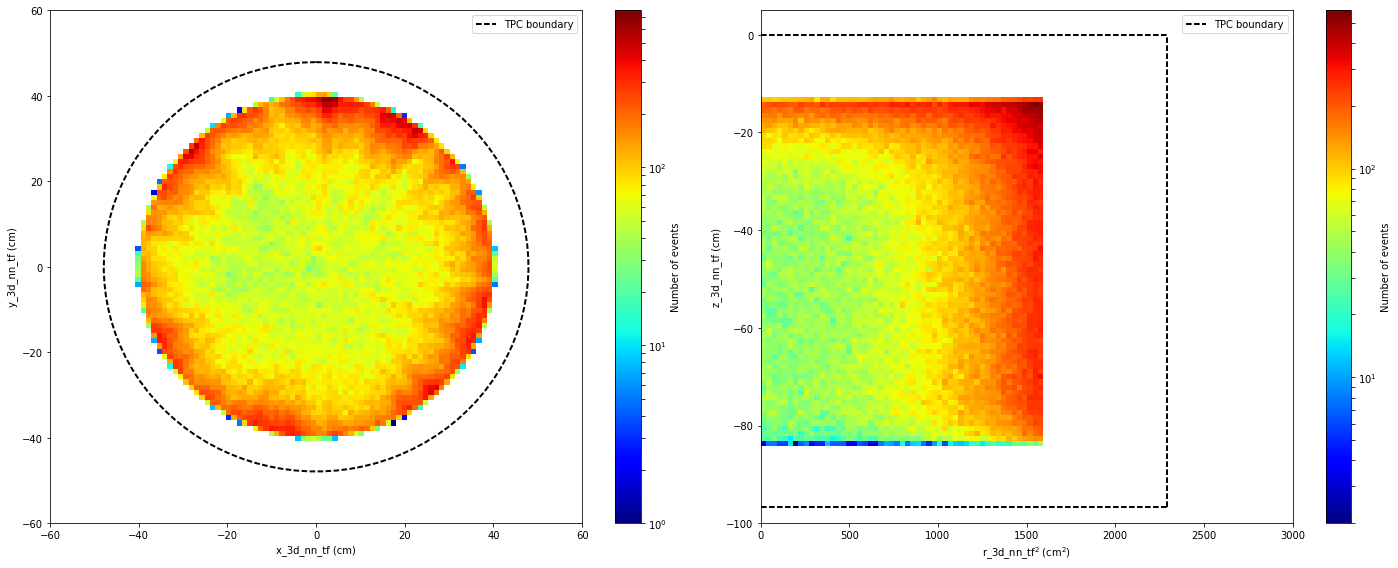

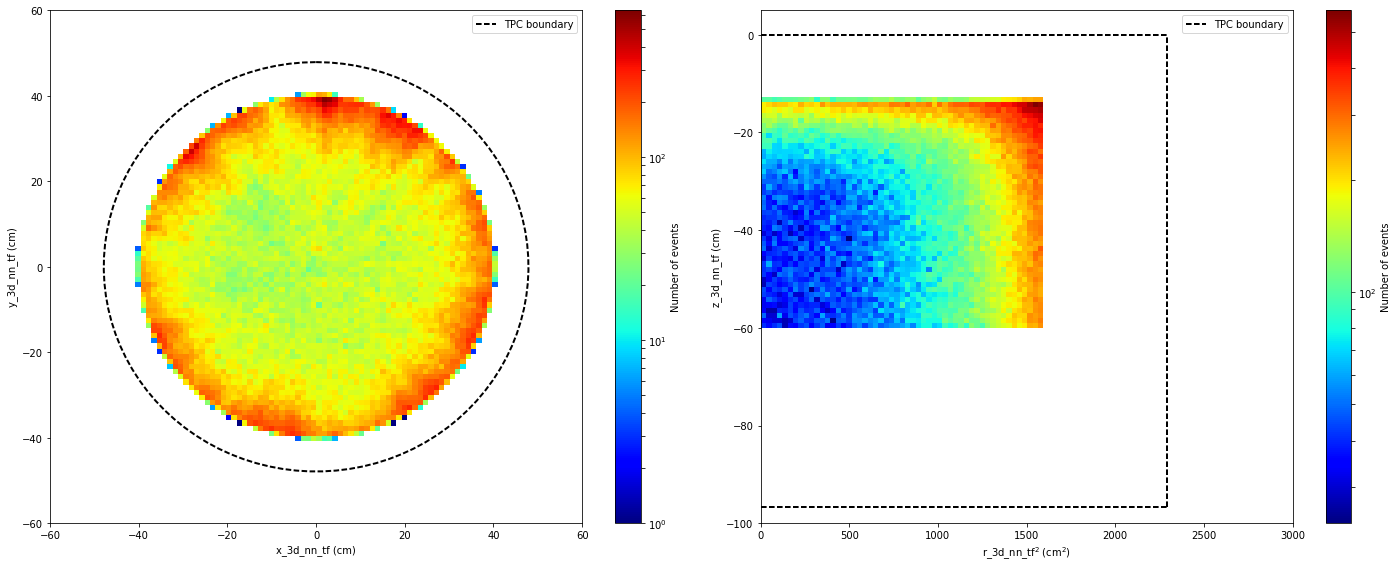

In [16]:
data_cut_2 = data_cut[data_cut['z_3d_nn_tf']>-60]
data_distribution(data_cut, 'x_3d_nn_tf', 'y_3d_nn_tf', 'z_3d_nn_tf', 'r_3d_nn_tf', bins=[100,100])
data_distribution(data_cut_2, 'x_3d_nn_tf', 'y_3d_nn_tf', 'z_3d_nn_tf', 'r_3d_nn_tf', bins=[100,100])

# NR and ER discrimination space

In [58]:
def ERMean(cs1):
    return 0.808636*np.exp(-cs1/23.0261) + 1.64898 -0.00107802*cs1
def ERM2Sigma(cs1):
    return 0.963811*np.exp(-cs1/21.8973) + 1.80553 -0.00114669*cs1
def ERP2Sigma(cs1):
    return 0.630351*np.exp(-cs1/22.234) + 1.51115 -0.00112959*cs1

def NGMean(cs1):
    return 0.491967*np.exp(-cs1/12.5384) + 1.58634 -0.00273731*cs1
def NGP2Sigma(cs1): 
    return 0.751578*np.exp(-cs1/17.3084) + 1.71979 -0.0029051*cs1
def NGM2Sigma(cs1):
    return 7.86254*np.exp(-cs1/1.00786) + 1.42755 -0.00238052*cs1

cs1 = np.linspace(1,3e4, 1e4)

log_y_ERMean = ERMean(cs1)
log_y_ERM2Sigma = ERM2Sigma(cs1)
log_y_ERP2Sigma = ERP2Sigma(cs1)

log_y_NGMean = NGMean(cs1)
log_y_NGM2Sigma = NGM2Sigma(cs1)
log_y_NGP2Sigma = NGP2Sigma(cs1)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


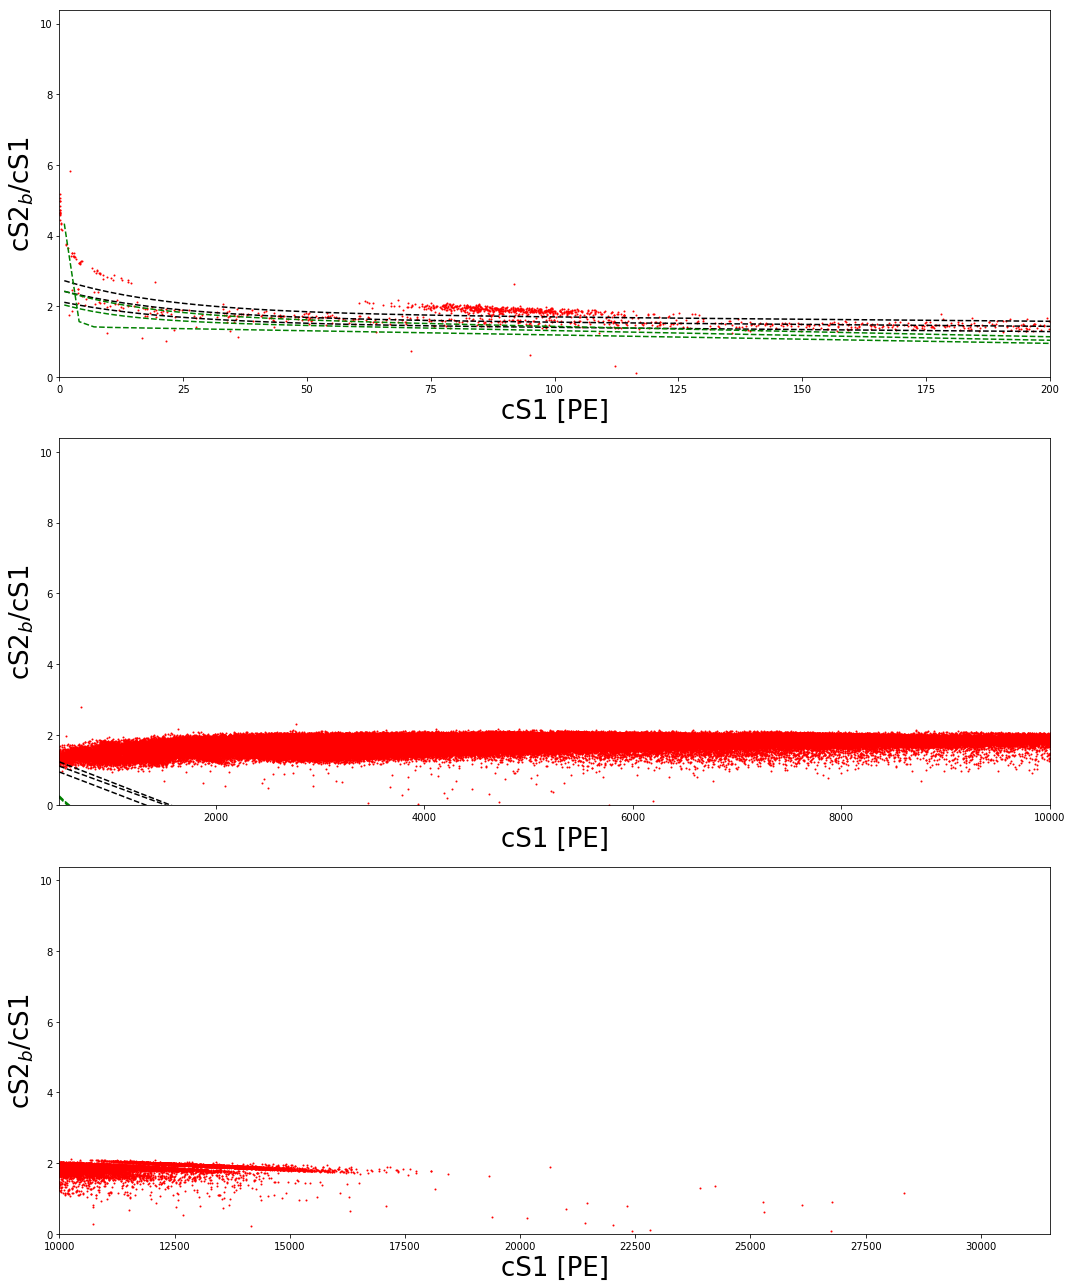

In [63]:
plt.figure(figsize=(15,18))

plt.subplot(311)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)

plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(0,200)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(312)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)

plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(500,10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(313)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.tight_layout()
plt.show()

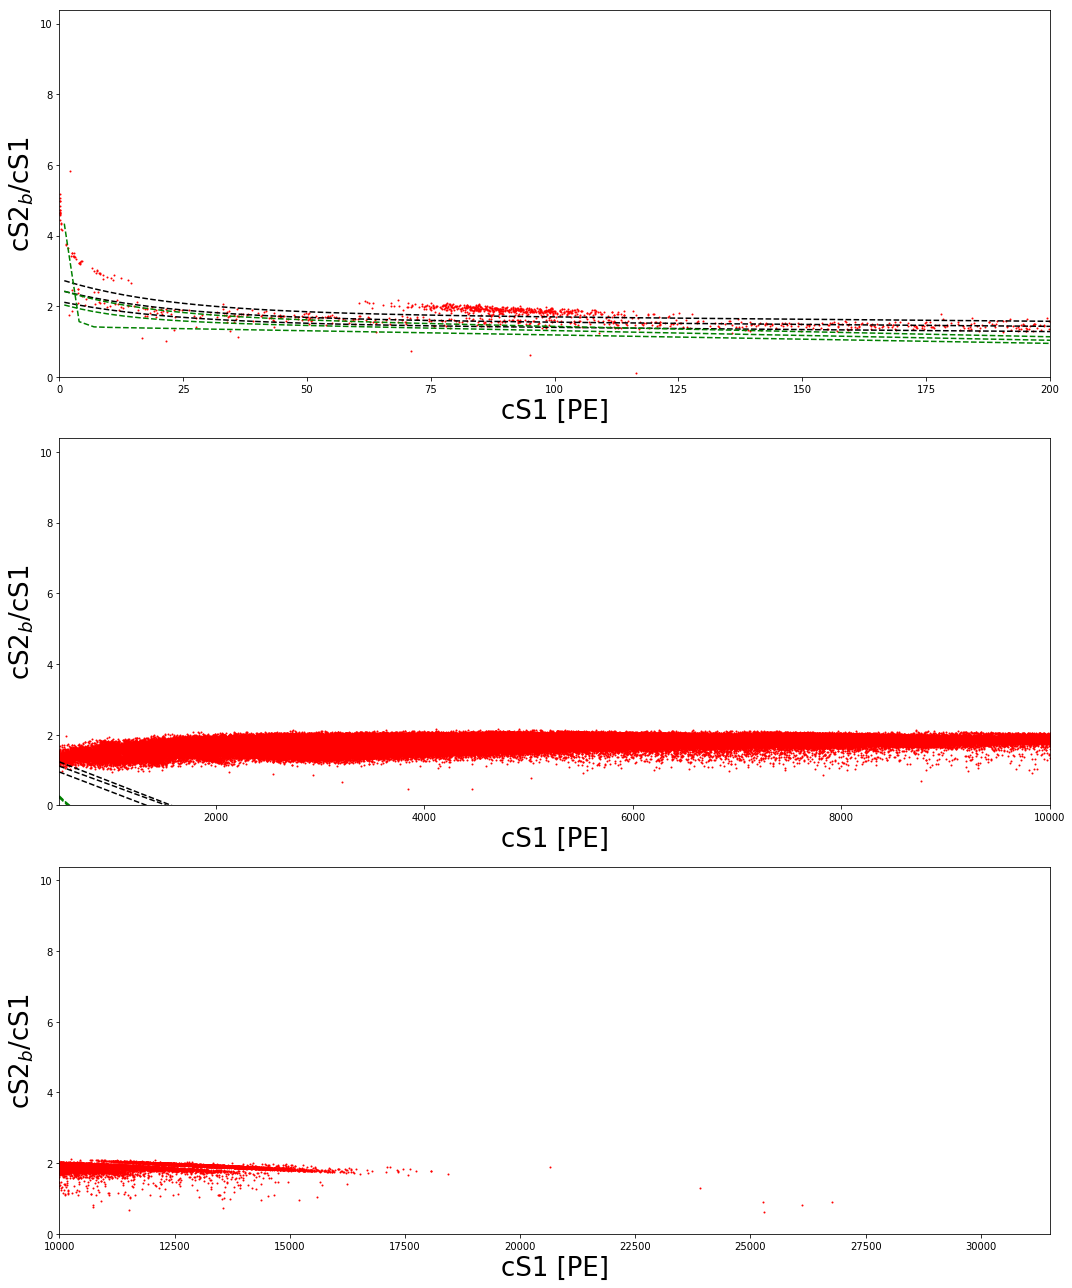

In [64]:
plt.figure(figsize=(15,18))

plt.subplot(311)
plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
         'ro', ms=1)

plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(0,200)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(312)
plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
         'ro', ms=1)

plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(500,10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(313)
plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.tight_layout()
plt.show()

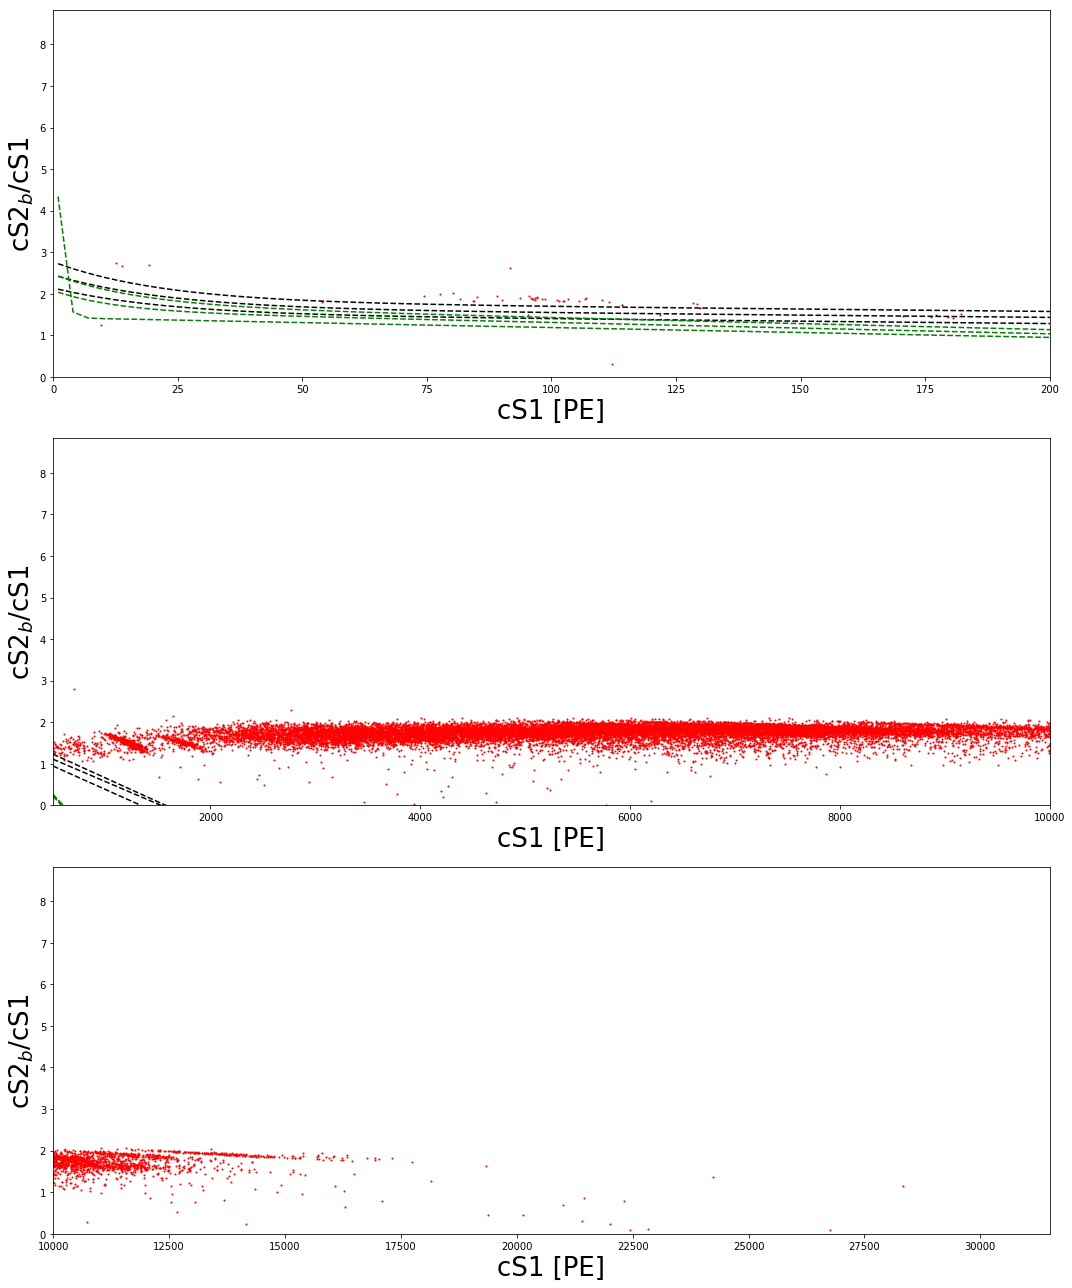

In [68]:
plt.figure(figsize=(15,18))

plt.subplot(311)
plt.plot(data_no_cut['cs1_nn_tf'], np.log10(data_no_cut['cs2_bottom_nn_tf']/data_no_cut['cs1_nn_tf']),
         'ro', ms=1)

plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(0,200)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(312)
plt.plot(data_no_cut['cs1_nn_tf'], np.log10(data_no_cut['cs2_bottom_nn_tf']/data_no_cut['cs1_nn_tf']),
         'ro', ms=1)

plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(500,10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(313)
plt.plot(data_no_cut['cs1_nn_tf'], np.log10(data_no_cut['cs2_bottom_nn_tf']/data_no_cut['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(cs1, log_y_ERMean, 'k--')
plt.plot(cs1, log_y_ERM2Sigma, 'k--')
plt.plot(cs1, log_y_ERP2Sigma, 'k--')

plt.plot(cs1, log_y_NGMean, 'g--')
plt.plot(cs1, log_y_NGM2Sigma, 'g--')
plt.plot(cs1, log_y_NGP2Sigma, 'g--')

plt.xlim(10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.tight_layout()
plt.show()

### Cut and no cut toghether

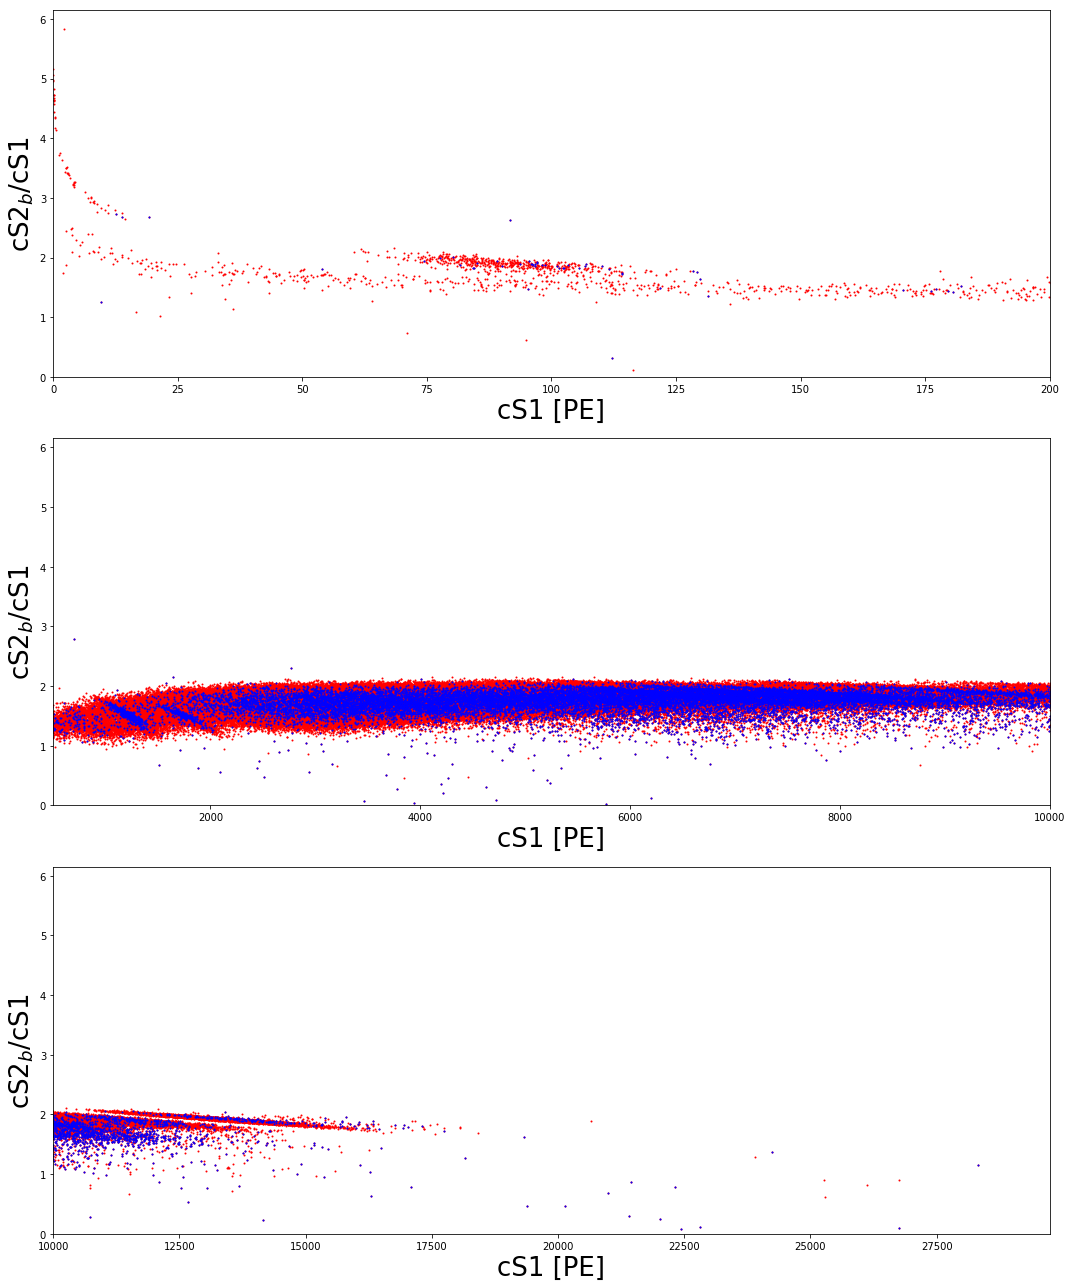

In [69]:
plt.figure(figsize=(15,18))

plt.subplot(311)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(data_no_cut['cs1_nn_tf'], np.log10(data_no_cut['cs2_bottom_nn_tf']/data_no_cut['cs1_nn_tf']),
         'bo', ms=1)
#plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
#         'bo', ms=1)

plt.xlim(0,200)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(312)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(data_no_cut['cs1_nn_tf'], np.log10(data_no_cut['cs2_bottom_nn_tf']/data_no_cut['cs1_nn_tf']),
         'bo', ms=1)
#plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
#         'bo', ms=1)

plt.xlim(500,10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(313)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(data_no_cut['cs1_nn_tf'], np.log10(data_no_cut['cs2_bottom_nn_tf']/data_no_cut['cs1_nn_tf']),
         'bo', ms=1)
#plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
#         'bo', ms=1)

plt.xlim(10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.tight_layout()
plt.show()

## Check of data with the cut on z

Unnamed selection: 385268 rows removed (6.39% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


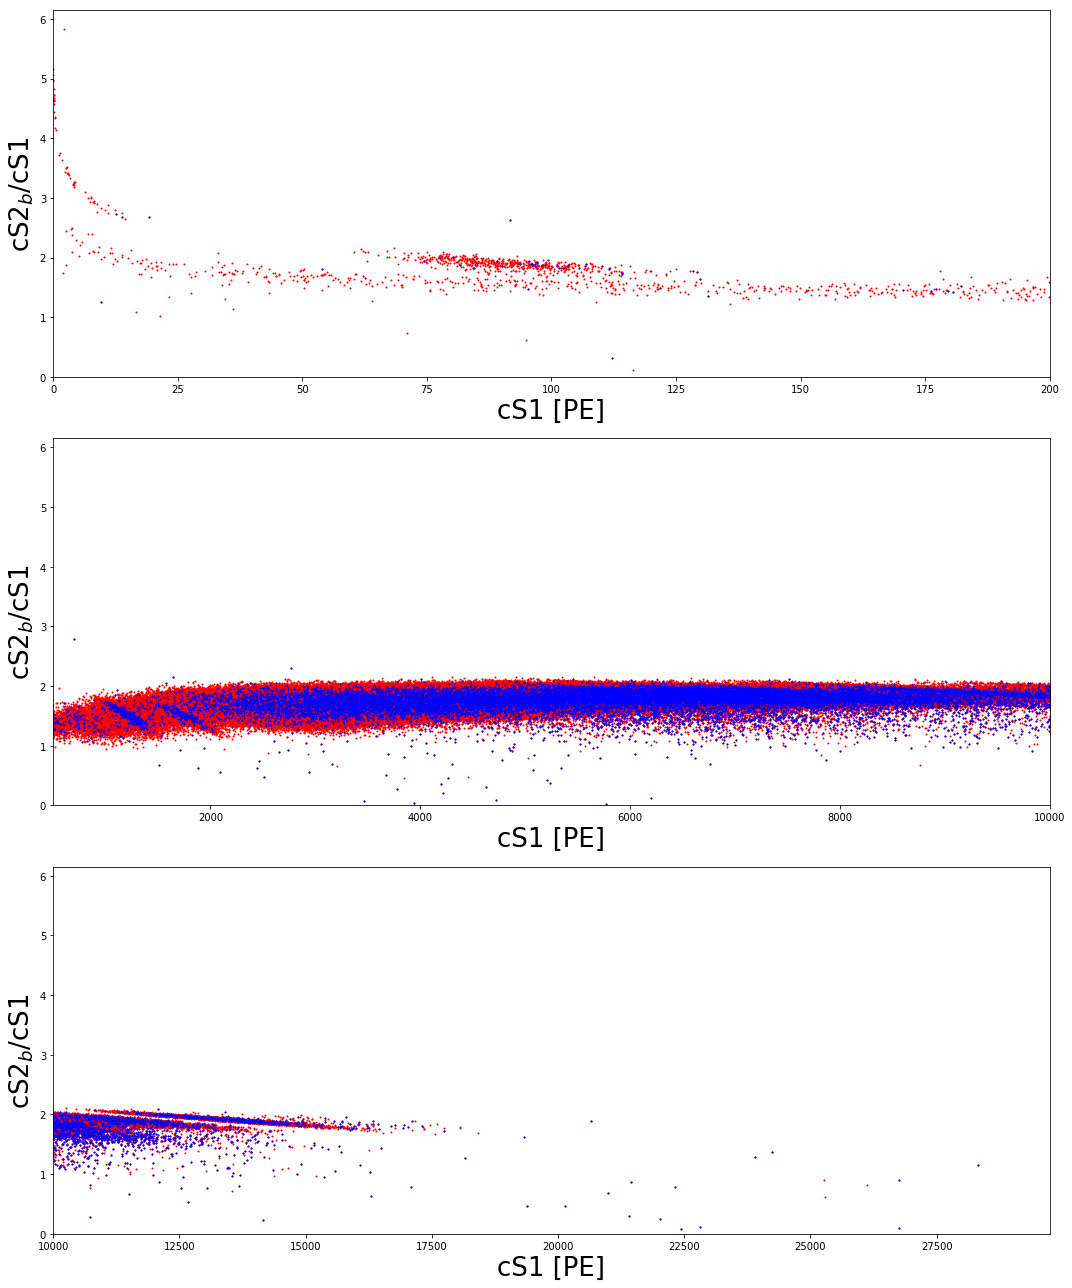

In [85]:
data_no_cut_in_z = hax.cuts.selection(data_1, data_1['CutS1PL_withZ'] == False)

plt.figure(figsize=(15,18))

plt.subplot(311)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(data_no_cut_in_z['cs1_nn_tf'], np.log10(data_no_cut_in_z['cs2_bottom_nn_tf']/data_no_cut_in_z['cs1_nn_tf']),
         'bo', ms=1)
#plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
#         'bo', ms=1)

plt.xlim(0,200)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(312)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(data_no_cut_in_z['cs1_nn_tf'], np.log10(data_no_cut_in_z['cs2_bottom_nn_tf']/data_no_cut_in_z['cs1_nn_tf']),
         'bo', ms=1)
#plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
#         'bo', ms=1)

plt.xlim(500,10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.subplot(313)
plt.plot(data_1['cs1_nn_tf'], np.log10(data_1['cs2_bottom_nn_tf']/data_1['cs1_nn_tf']),
         'ro', ms=1)
plt.plot(data_no_cut_in_z['cs1_nn_tf'], np.log10(data_no_cut_in_z['cs2_bottom_nn_tf']/data_no_cut_in_z['cs1_nn_tf']),
         'bo', ms=1)
#plt.plot(data_cut['cs1_nn_tf'], np.log10(data_cut['cs2_bottom_nn_tf']/data_cut['cs1_nn_tf']),
#         'bo', ms=1)

plt.xlim(10000)
plt.ylim(0)
#plt.yscale('log')
plt.xlabel('cS1 [PE]', fontsize=26)
plt.ylabel('cS2$_b$/cS1', fontsize=26) 

plt.tight_layout()
plt.show()